In [14]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv(r'\Data\FB.csv')

In [16]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
1,2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2,2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
3,2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
4,2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600
5,2014-12-15,78.459999,78.580002,76.559998,76.989998,76.989998,29396500
6,2014-12-16,76.190002,77.389999,74.589996,74.690002,74.690002,31554600
7,2014-12-17,75.010002,76.410004,74.900002,76.110001,76.110001,29203900
8,2014-12-18,76.889999,78.400002,76.510002,78.400002,78.400002,34222100
9,2014-12-19,78.750000,80.000000,78.330002,79.879997,79.879997,43335000


In [17]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [18]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [19]:
for name, column in df[['Close' ,'Open' ,'High','Low']].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: Close
Test Statistic                   -1.338096
p-value                           0.611568
No Lags Used                      0.000000
Number of Observations Used    1258.000000
Critical Value (1%)              -3.435559
Critical Value (5%)              -2.863840
Critical Value (10%)             -2.567995
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Open
Test Statistic                   -1.014123
p-value                           0.748078
No Lags Used                     11.000000
Number of Observations Used    1247.000000
Critical Value (1%)              -3.435605
Critical Value (5%)              -2.863861
Critical Value (10%)             -2.568005
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                   -1.255326
p-value                      

In [20]:
X = df[['Close' ]]
actualtrain, actualtest = X[0:-30], X[-30:]
exoX = df[['Open' ]]
exotrain, exotest = exoX[0:-30], exoX[-30:]


 Fitting SARIMAX for Seasonal value m = 1
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5155.727, BIC=5181.297, Fit time=0.372 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5178.246, BIC=5193.587, Fit time=0.310 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=5157.564, BIC=5178.020, Fit time=0.338 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=5155.602, BIC=5176.058, Fit time=0.348 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5156.191, BIC=5181.761, Fit time=0.508 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=5156.189, BIC=5186.873, Fit time=1.472 seconds
Total fit time: 3.355 seconds
Model summary for  m = 1
----------------------------------------------------------------------------------------------------
Evaluation metric results:-
MSE is : 3.5285763443158857
MSE is : 1.4505269484554872
RMSE is : 1.878450516866464
MAPE is : 0.7468512728422877
R2 is : 0.807211031

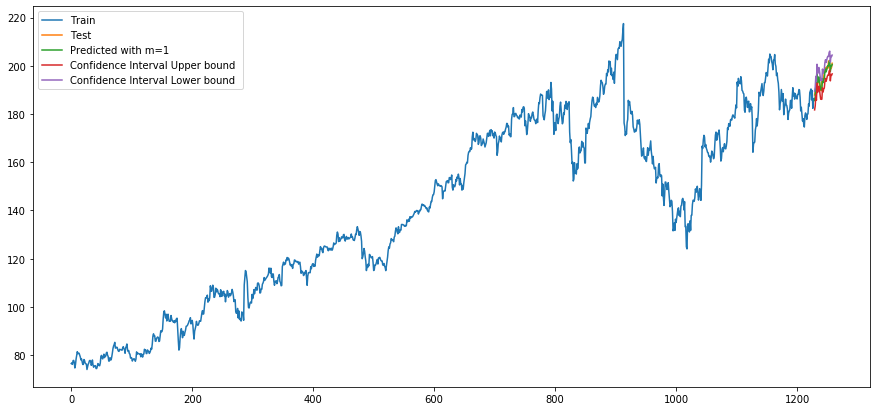

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 1


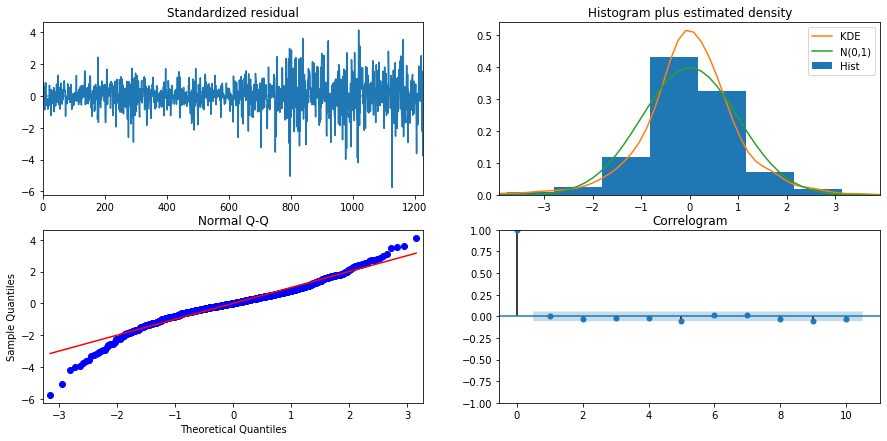

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 4
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 4); AIC=5158.880, BIC=5194.678, Fit time=1.710 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=5178.246, BIC=5193.587, Fit time=0.340 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=5159.298, BIC=5184.868, Fit time=0.555 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=5157.178, BIC=5182.747, Fit time=0.536 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 1, 4); AIC=5158.636, BIC=5189.320, Fit time=0.251 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=5155.602, BIC=5176.058, Fit time=0.356 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=5155.727, BIC=5181.297, Fit time=0.350 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=5156.191, BIC=5181.761, Fit time=0.546 seconds
F

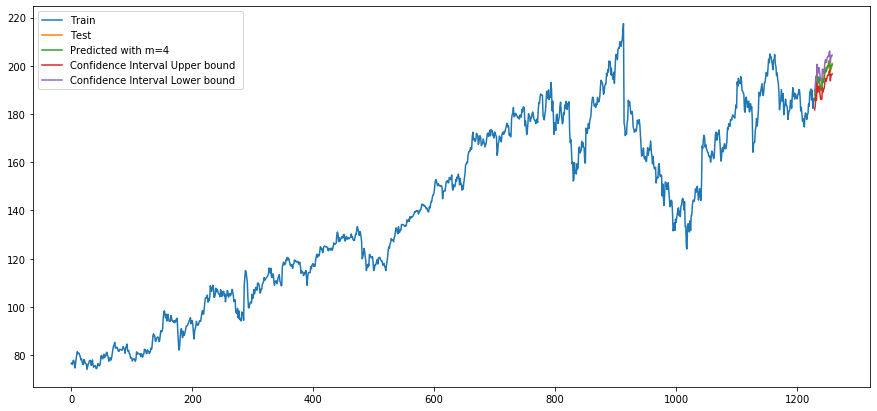

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 4


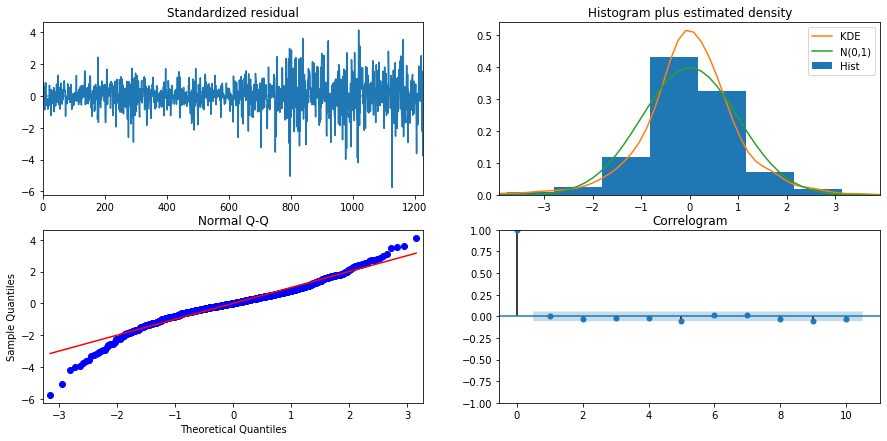

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 6
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 6); AIC=5159.517, BIC=5195.314, Fit time=1.997 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 6); AIC=5178.246, BIC=5193.587, Fit time=0.358 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 6); AIC=5159.099, BIC=5184.669, Fit time=0.683 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 6); AIC=5157.149, BIC=5182.719, Fit time=0.669 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 1, 6); AIC=5159.281, BIC=5189.965, Fit time=0.861 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 6); AIC=5155.602, BIC=5176.058, Fit time=0.334 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 6); AIC=5155.727, BIC=5181.297, Fit time=0.363 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 6); AIC=5156.191, BIC=5181.761, Fit time=0.556 seconds
F

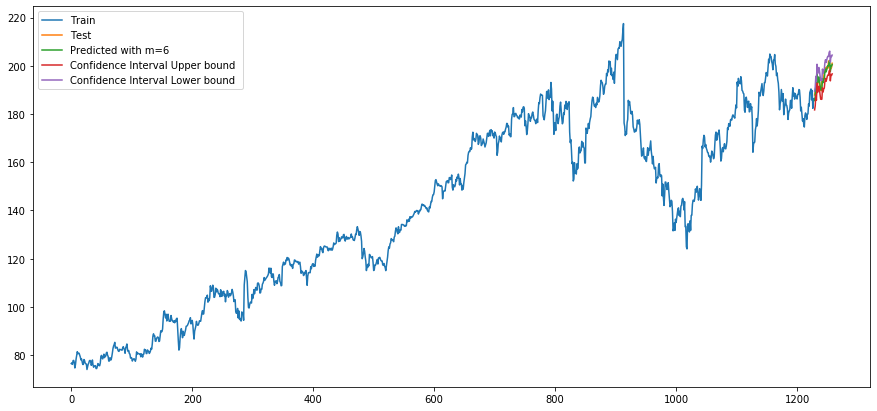

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 6


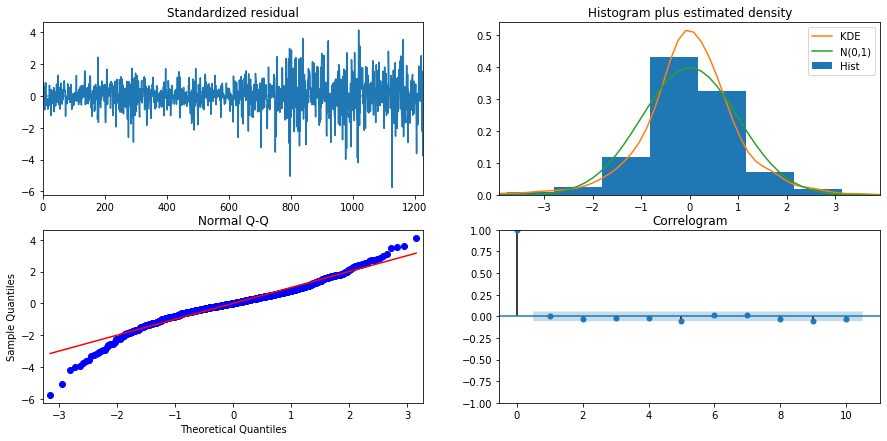

----------------------------------------------------------------------------------------------------
 Fitting SARIMAX for Seasonal value m = 12
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=5158.566, BIC=5194.363, Fit time=3.527 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 12); AIC=5178.246, BIC=5193.587, Fit time=0.327 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 12); AIC=5158.340, BIC=5183.910, Fit time=1.043 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 12); AIC=5156.426, BIC=5181.996, Fit time=1.522 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 1, 12); AIC=5158.620, BIC=5189.304, Fit time=1.685 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=5155.602, BIC=5176.058, Fit time=0.356 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 12); AIC=5155.727, BIC=5181.297, Fit time=0.387 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 0, 0, 12); AIC=5156.191, BIC=5181.761, Fit time=0.536 

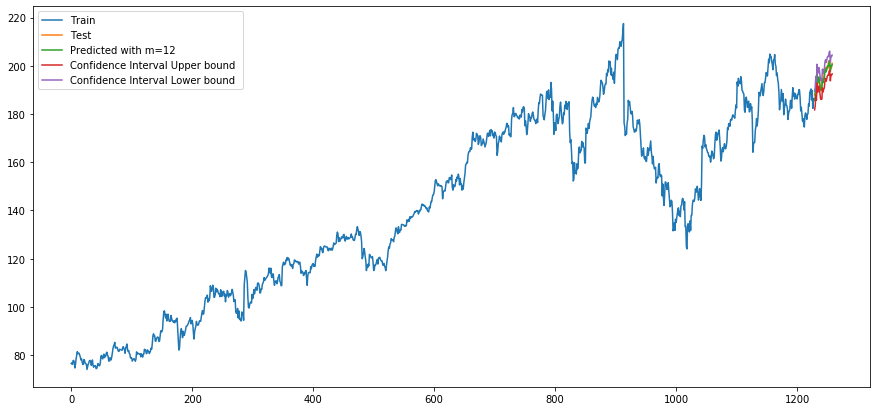

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


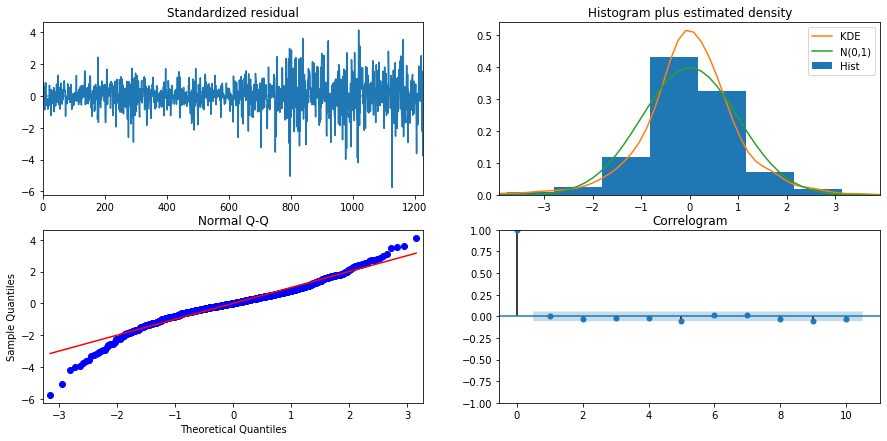

----------------------------------------------------------------------------------------------------


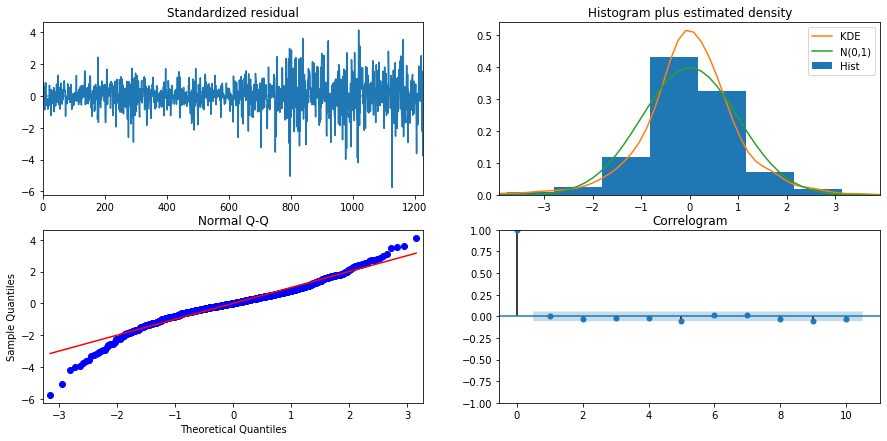

In [21]:


for m in [1, 4, 6, 12]:
    print("="*100)
    print(f' Fitting SARIMAX for Seasonal value m = {str(m)}')
    stepwise_model = auto_arima(actualtrain,exogenous =exotrain ,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=True,start_P=1,start_Q=1,max_P=7,max_D=7,max_Q=7,m=m,
    d=None,D=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)


    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()

    forecast,conf_int = stepwise_model.predict(n_periods=30,exogenous =exotest,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = range(1229, 1259)
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['close_pred'])
    forecast["new_index"] = range(1229, 1259)
    forecast = forecast.set_index("new_index")

    timeseries_evaluation_metrics_func(actualtest, forecast)

    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(actualtrain, label='Train ')
    plt.plot(actualtest, label='Test ')
    plt.plot(forecast, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    
    display(stepwise_model.plot_diagnostics());
    print("-"*100)